# 데이터 탐색

## 기술 통계

`summary`: 데이터에 대한 간략한 분포 정보<br>
`Hmisc::describe`: 통계 요약 정보<br>
`Hmisc::summary.formula`: 포뮬러를 사용해 데이터 요약

In [4]:
library(Hmisc)

In [5]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [6]:
describe(mtcars)

mtcars 

 11  Variables      32  Observations
--------------------------------------------------------------------------------
mpg 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      32        0       25    0.999    20.09    6.796    12.00    14.34 
     .25      .50      .75      .90      .95 
   15.43    19.20    22.80    30.09    31.30 

lowest : 10.4 13.3 14.3 14.7 15.0, highest: 26.0 27.3 30.4 32.4 33.9
--------------------------------------------------------------------------------
cyl 
       n  missing distinct     Info     Mean      Gmd 
      32        0        3    0.866    6.188    1.948 
                            
Value          4     6     8
Frequency     11     7    14
Proportion 0.344 0.219 0.438
--------------------------------------------------------------------------------
disp 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      32        0       27    0.999    230.7    142.5    77.35    80.61 
     .25      .

In [7]:
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

rhs 각각으로 lhs를 요약해보자. 

mpg(1갤런당 주행 마일)를 cyl(실린더의 수)와 hp(마력)에 따라 요약해보자. cyl의 값 4, 6, 8에 따른 mpg, hp의 범위에 따른 mpg가 요약되어 나타난다.

In [10]:
summary(mpg ~ cyl + hp, data=mtcars)

mpg     N= 32 

+-------+---------+--+--------+
|       |         | N|     mpg|
+-------+---------+--+--------+
|    cyl|        4|11|26.66364|
|       |        6| 7|19.74286|
|       |        8|14|15.10000|
+-------+---------+--+--------+
|     hp|[ 52, 97)| 8|27.50000|
|       |[ 97,150)| 9|21.31111|
|       |[150,205)| 8|17.15000|
|       |[205,335]| 7|13.41429|
+-------+---------+--+--------+
|Overall|         |32|20.09062|
+-------+---------+--+--------+

fun에 함수를 지정하면 다른 요약 값도 얻을 수 있다.

In [11]:
summary(mpg ~ cyl + hp, data=mtcars, fun=var)

mpg     N= 32 

+-------+---------+--+---------+
|       |         | N|  mpg mpg|
+-------+---------+--+---------+
|    cyl|        4|11|20.338545|
|       |        6| 7| 2.112857|
|       |        8|14| 6.553846|
+-------+---------+--+---------+
|     hp|[ 52, 97)| 8|18.494286|
|       |[ 97,150)| 9|13.743611|
|       |[150,205)| 8| 3.431429|
|       |[205,335]| 7| 4.804762|
+-------+---------+--+---------+
|Overall|         |32|36.324103|
+-------+---------+--+---------+

lhs의 분류에 따라 rhs를 요약해보자.

cyl에 따라 mpg와 hp를 요약한 결과이다.

In [13]:
summary(cyl ~ mpg + hp, data=mtcars, method="reverse")



Descriptive Statistics by cyl

+---+--------------------+--------------------+--------------------+
|   |4                   |6                   |8                   |
|   |(N=11)              |(N=7)               |(N=14)              |
+---+--------------------+--------------------+--------------------+
|mpg|  22.80/26.00/30.40 |  18.65/19.70/21.00 |  14.40/15.20/16.25 |
+---+--------------------+--------------------+--------------------+
|hp | 65.50/ 91.00/ 96.00|110.00/110.00/123.00|176.25/192.50/241.25|
+---+--------------------+--------------------+--------------------+

rhs 변수의 조합으로 lhs를 요약해보자.

mpg를 cyl과 hp의 조합으로 요약한 결과이다.

In [14]:
summary(mpg ~ cyl + hp, data=mtcars, method="cross")

,cyl,hp,S,N,Missing
,<fct>,<fct>,<dbl>,<int>,<int>
1,4,"[ 52, 97)",27.50000,8,0
2,6,"[ 52, 97)",NA,0,0
3,8,"[ 52, 97)",NA,0,0
4,ALL,"[ 52, 97)",27.50000,8,0
5,4,"[ 97,150)",24.43333,3,0
6,6,"[ 97,150)",19.75000,6,0
7,8,"[ 97,150)",NA,0,0
8,ALL,"[ 97,150)",21.31111,9,0
9,4,"[150,205)",NA,0,0


## 데이터 시각화

`plot`: 데이터의 적절한 형태의 그래프를 찾아서 그려준다<br>
`caret::featurePlot`: 예측 변수(피처)와 분류 간의 그래프를 그려준다

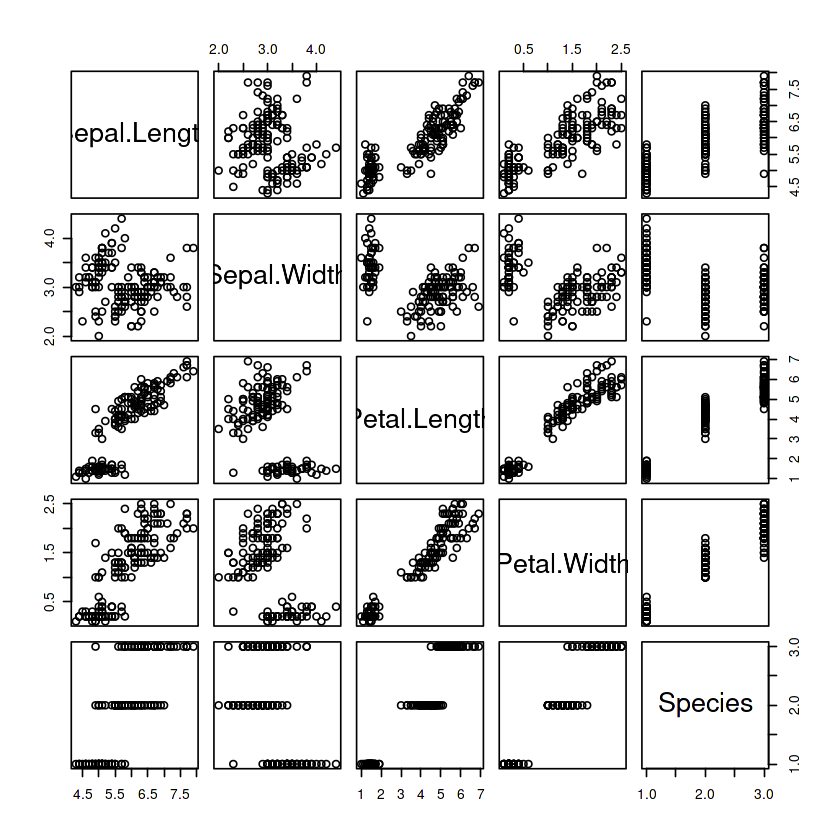

In [15]:
plot(iris)

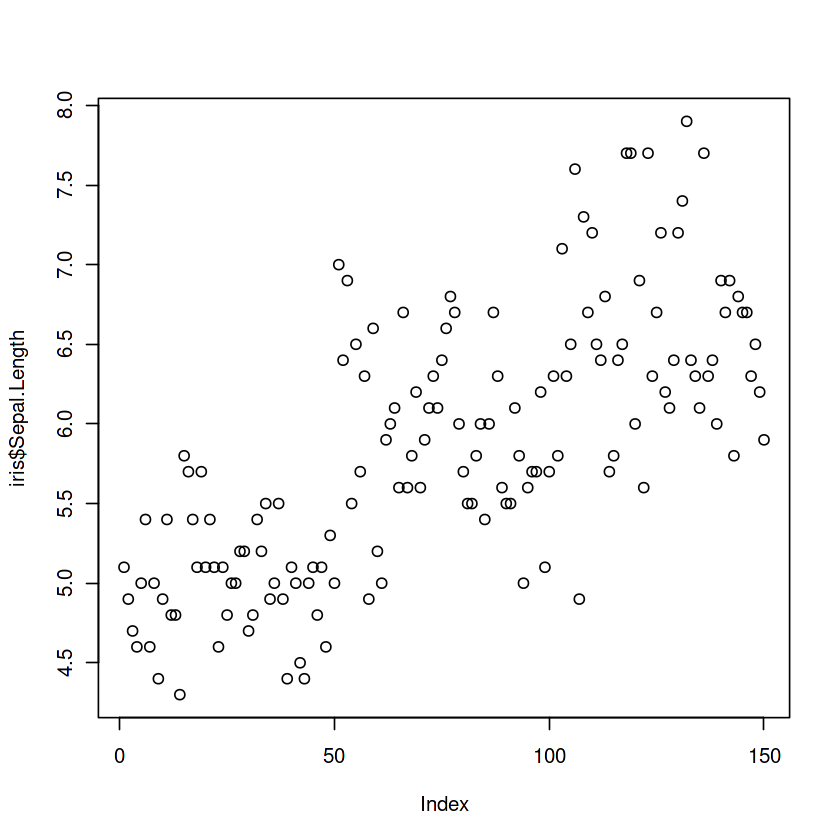

In [16]:
plot(iris$Sepal.Length)

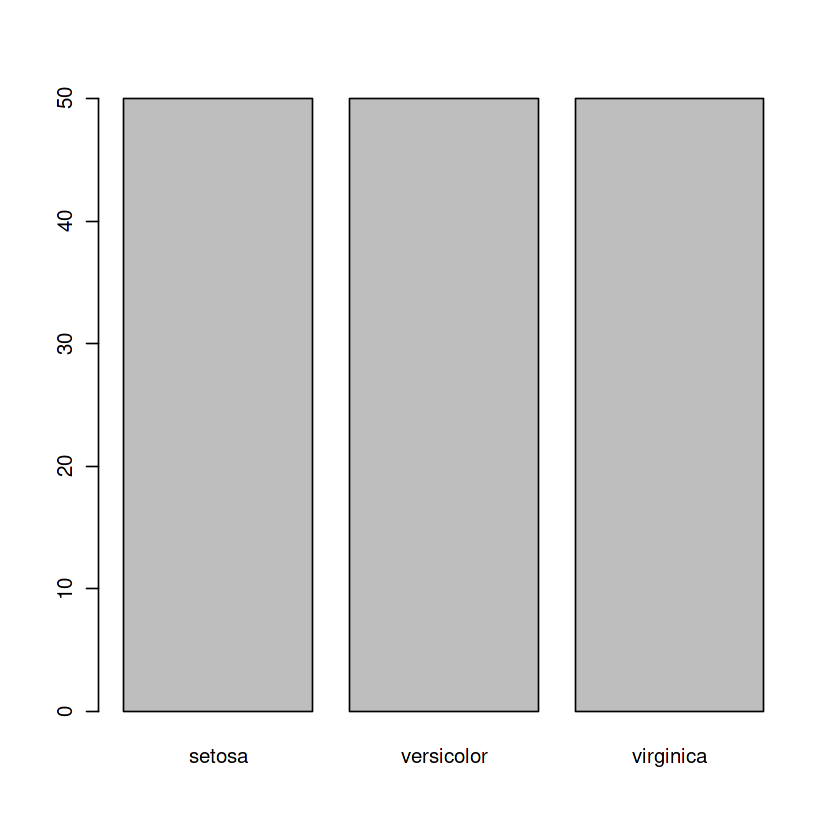

In [17]:
plot(iris$Species)

포뮬러를 사용하여 데이터를 붓꽃의 종별로 분리해 그려보자

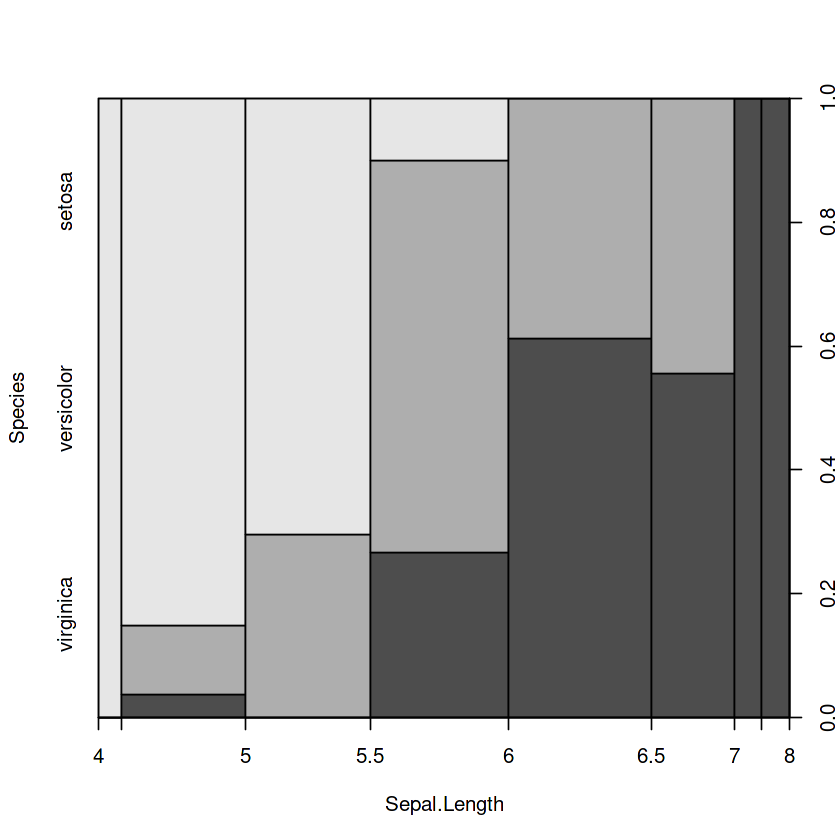

In [18]:
plot(Species ~ Sepal.Length, data=iris)

Species를 숫자로 변환하여 점 모양으로 지정해서 나타내보자.

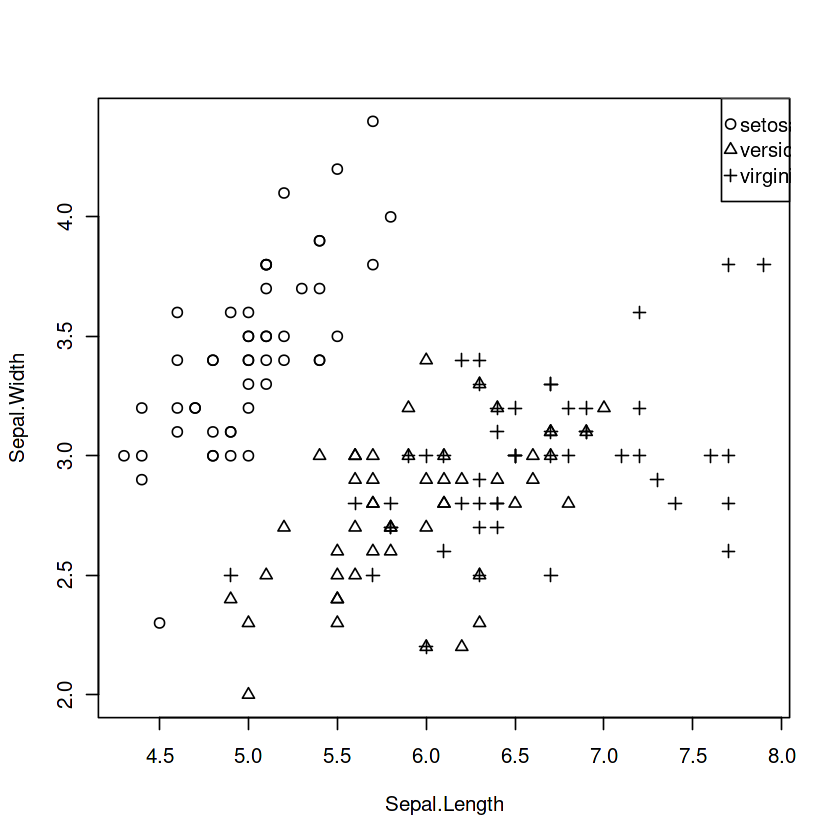

In [19]:
with(iris, {
    plot(Sepal.Length, Sepal.Width, pch=as.numeric(Species))
    legend("topright", legend=levels(iris$Species), pch=1:3)
})

featurePlot 함수는 피처와 분류 간의 관련성을 쉽게 시각화해준다.

아이리스의 모든 변수를 Species에 따라 그리되 Species별 구분은 타원으로 표시해보자. 붓꽃 종별로 데이터 분포를 한 눈에 파악할 수 있으므로 Species를 피처 변수들로 알아낼 수 있는지 판단할 수 있다.

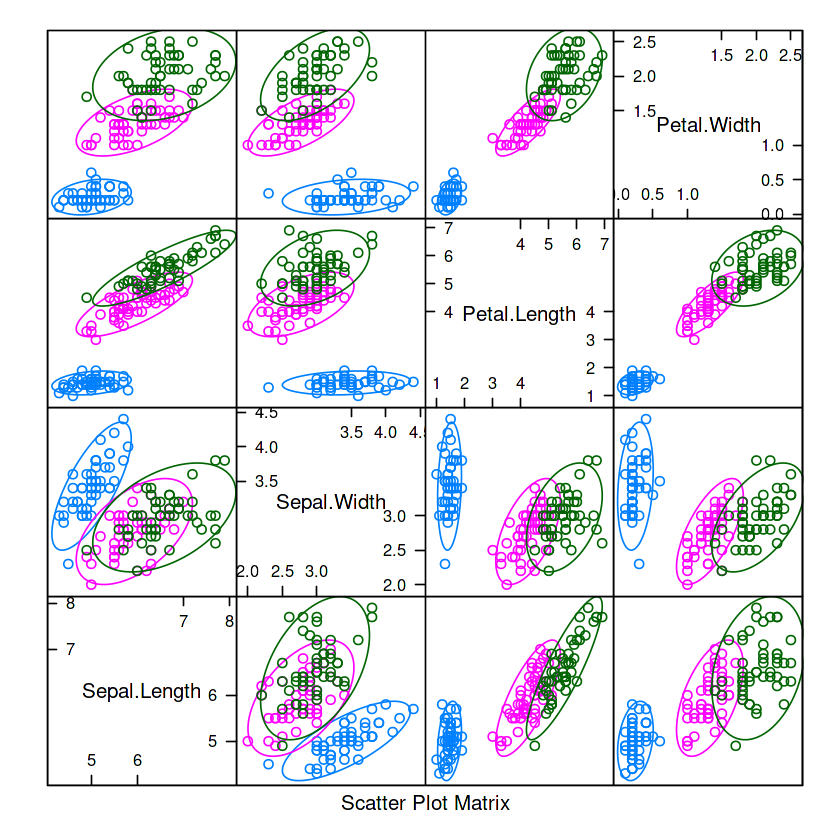

In [21]:
library(caret)
featurePlot(iris[,1:4], iris$Species, "ellipse")